# CSC3831 Final Assessment - Part I: Data Engineering



In [ ]:
# Loading in standard packages for analysis, feel free to add an extra packages you'd like to use here
import random
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
# Loading in the corrupted dataset to be used in analysis and imputation
houses_corrupted = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv', header=0)
# Remove an artifact from the dataset
houses_corrupted.drop(["Unnamed: 0"], axis=1, inplace=True)

Above we've loaded in a corrupted version of a housing dataset. The anomalies need to be dealt with and missing values imputed.

### 1. Data Understanding [7]
- Perform ad hoc EDA to understand and describe what you see in the raw dataset
  - Include graphs, statistics, and written descritpions as appropriate
  - Any extra information about the data you can provide here is useful, think about performing an analysis (ED**A**), what would you find interesting or useful?
- Identify features with missing records, outlier records


In this step, we load the raw housing dataset and perform an initial examination to understand its structure. Let's look at the dataset in a neater, more human readable and examine its structure by viewing the first few rows. This will help us understand the columns available, their data types, and get an initial look at the values.


The head() function shows the first few rows of the dataset, while info() provides details about data types, column names, and any missing values.

In [ ]:
houses_corrupted.head(10)

median_house_value  median_income  housing_median_age  total_rooms  \
0            452600.0         8.3252                41.0        880.0   
1            358500.0         8.3014                21.0       7099.0   
2            352100.0         7.2574                52.0       1467.0   
3            341300.0         5.6431                52.0       1274.0   
4            342200.0         3.8462                52.0       1627.0   
5            269700.0         4.0368                52.0        919.0   
6            299200.0         3.6591                52.0       2535.0   
7            241400.0         3.1200                52.0       3104.0   
8            226700.0         2.0804                42.0       2555.0   
9            261100.0         3.6912                52.0       3549.0   

   total_bedrooms  population  households  latitude  longitude  
0           129.0       322.0       126.0     37.88    -122.23  
1          1106.0      2401.0      1138.0     37.86    -122.22  
2           190.0         NaN       177.0     37.85    -122.24  
3           235.0         NaN       219.0     37.85    -122.25  
4           280.0       565.0       259.0     37.85    -122.25  
5           213.0       413.0       193.0     37.85    -122.25  
6           489.0      1094.0       514.0     37.84    -122.25  
7           687.0      1157.0       647.0     37.84    -122.25  
8           665.0      1206.0       595.0     37.84    -122.26  
9           707.0      1551.0       714.0     37.84    -122.25

In [ ]:
houses_corrupted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       18576 non-null  float64
 2   housing_median_age  18576 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          18576 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


The dataset contains information about housing characteristics across various locations. All key features displays here are the same decimal numeric variables. My observation indicates the values are in median as it's easy when handling potential outliers in prices or incomes. Outliers are values of your data that exceeds the average value. The structure which have 9 columns and 20640 entries all stored as floating point numbers with median_income, housing_median_age, and population columns with only 18576 entries.

We also need to learn how distributed and characteristics of our data to make informed decisions and describe method helps output summary statistics of each feature as inital inspection.

In [ ]:
houses_corrupted.describe()

median_house_value  median_income  housing_median_age   total_rooms  \
count        20640.000000   18576.000000        18576.000000  20640.000000   
mean        206855.816909       3.929958           28.324182   2635.763081   
std         115395.615874       1.964296           12.584914   2181.615252   
min          14999.000000       0.499900            1.000000      2.000000   
25%         119600.000000       2.560300           18.000000   1447.750000   
50%         179700.000000       3.572400           28.000000   2127.000000   
75%         264725.000000       4.870050           37.000000   3148.000000   
max         500001.000000      15.000100           52.000000  39320.000000   

       total_bedrooms    population    households      latitude     longitude  
count    20640.000000  18576.000000  20640.000000  20640.000000  20640.000000  
mean       537.898014   1488.069283    499.539680     35.631861   -119.569704  
std        421.247906   1170.585810    382.329753      2.135952      2.003532  
min          1.000000      3.000000      1.000000     32.540000   -124.350000  
25%        295.000000    839.000000    280.000000     33.930000   -121.800000  
50%        435.000000   1227.000000    409.000000     34.260000   -118.490000  
75%        647.000000   1803.000000    605.000000     37.710000   -118.010000  
max       6445.000000  35682.000000   6082.000000     41.950000   -114.310000

The .describe() method reveals interesting details about each feature. For instance, The median_house_value ranges from 14,999 to 500,001, indicating a wide variety of house prices. The median_income ranges from 0.5 to 15, showing that there are some districts with very low or high income levels. Its also logical such as total_rooms and population have very high values in some districts, indicating large areas with potentially many people living there. Standard deviations indicate high variability in attributes like total_rooms and population. Since the values are numerical we can plot them easily. It might be better to see them in graphs to see more clearly.

In [ ]:
houses_corrupted.isnull().sum()

median_house_value       0
median_income         2064
housing_median_age    2064
total_rooms              0
total_bedrooms           0
population            2064
households               0
latitude                 0
longitude                0
dtype: int64

<Axes: >

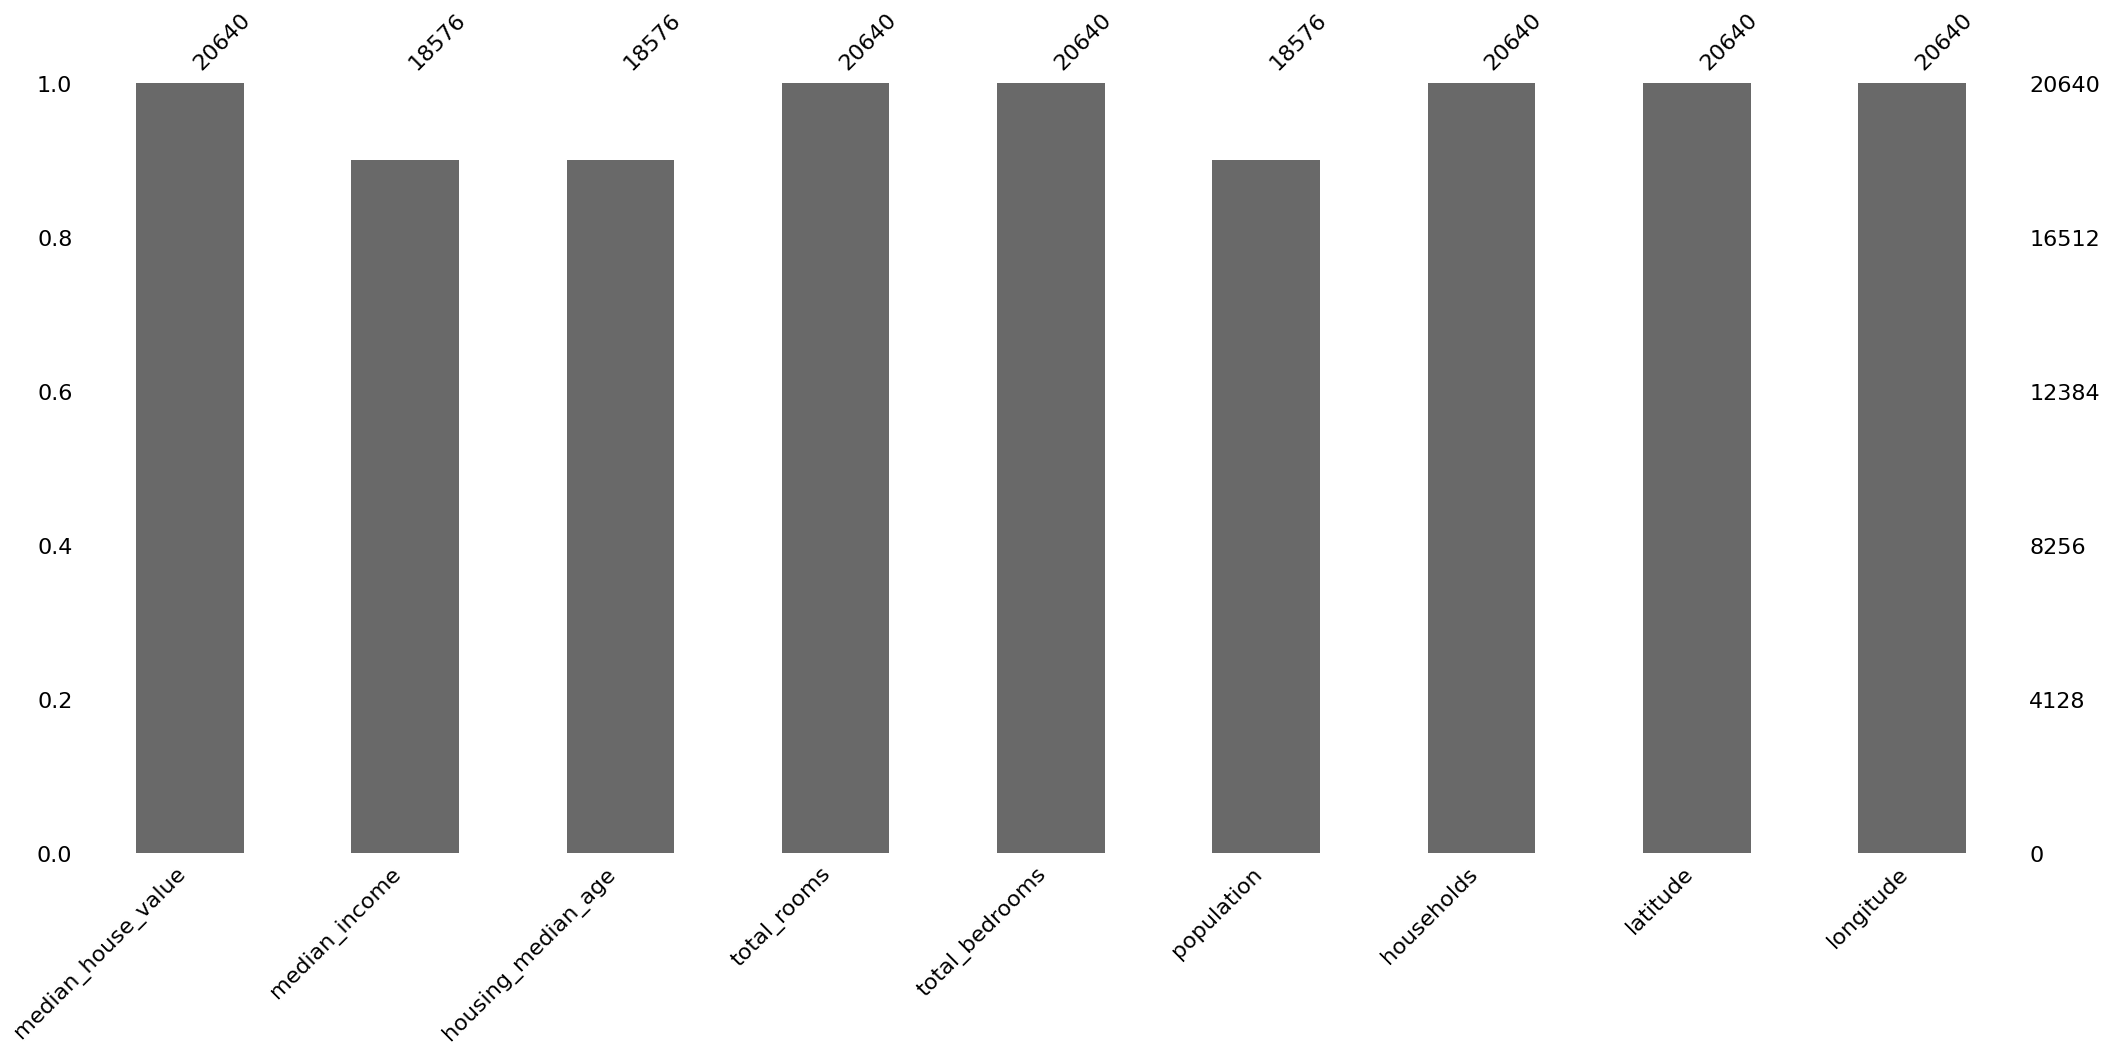

In [ ]:
%matplotlib inline
msno.bar(houses_corrupted)

The pairplot provides a fast overview of relationships between selected features in the dataset. Each scatterplot represents the relationship between two features, while the diagonal displays the distribution of each feature using histograms or density plots. This visualization is useful for identifying trends, correlations, and potential outliers.

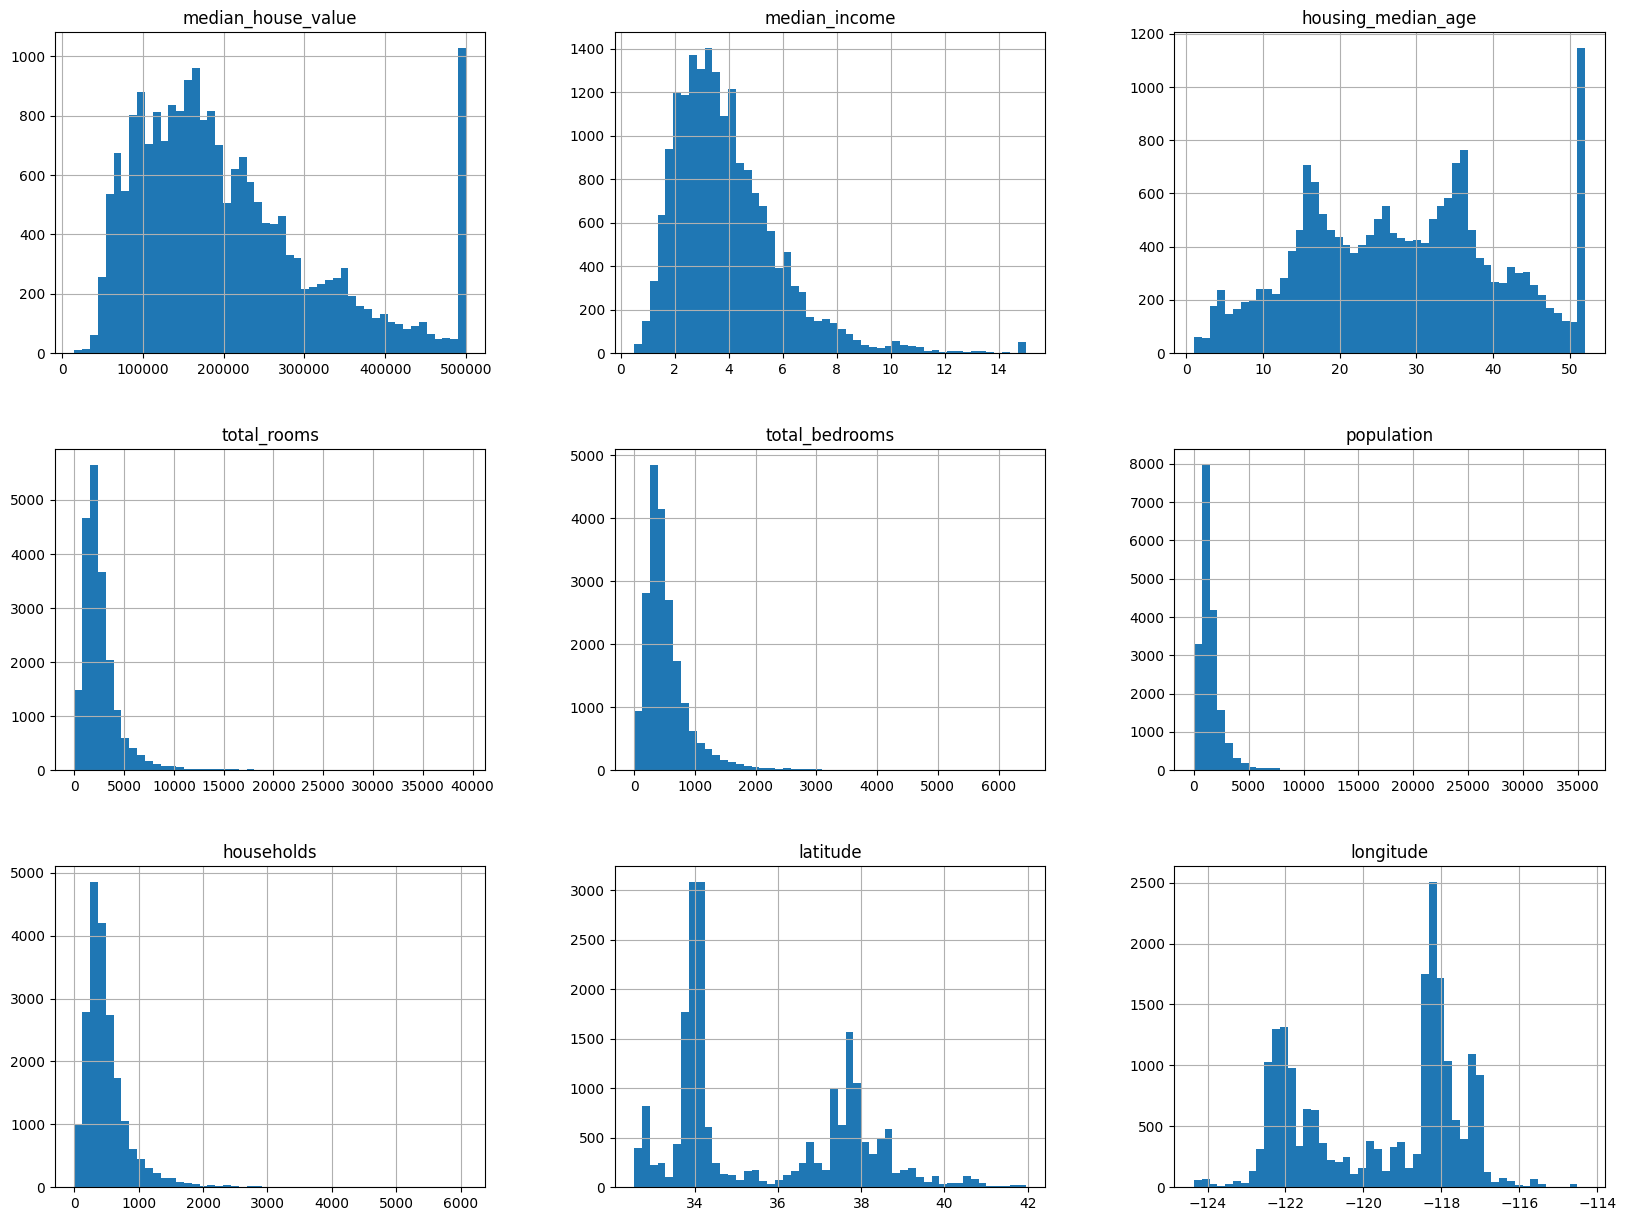

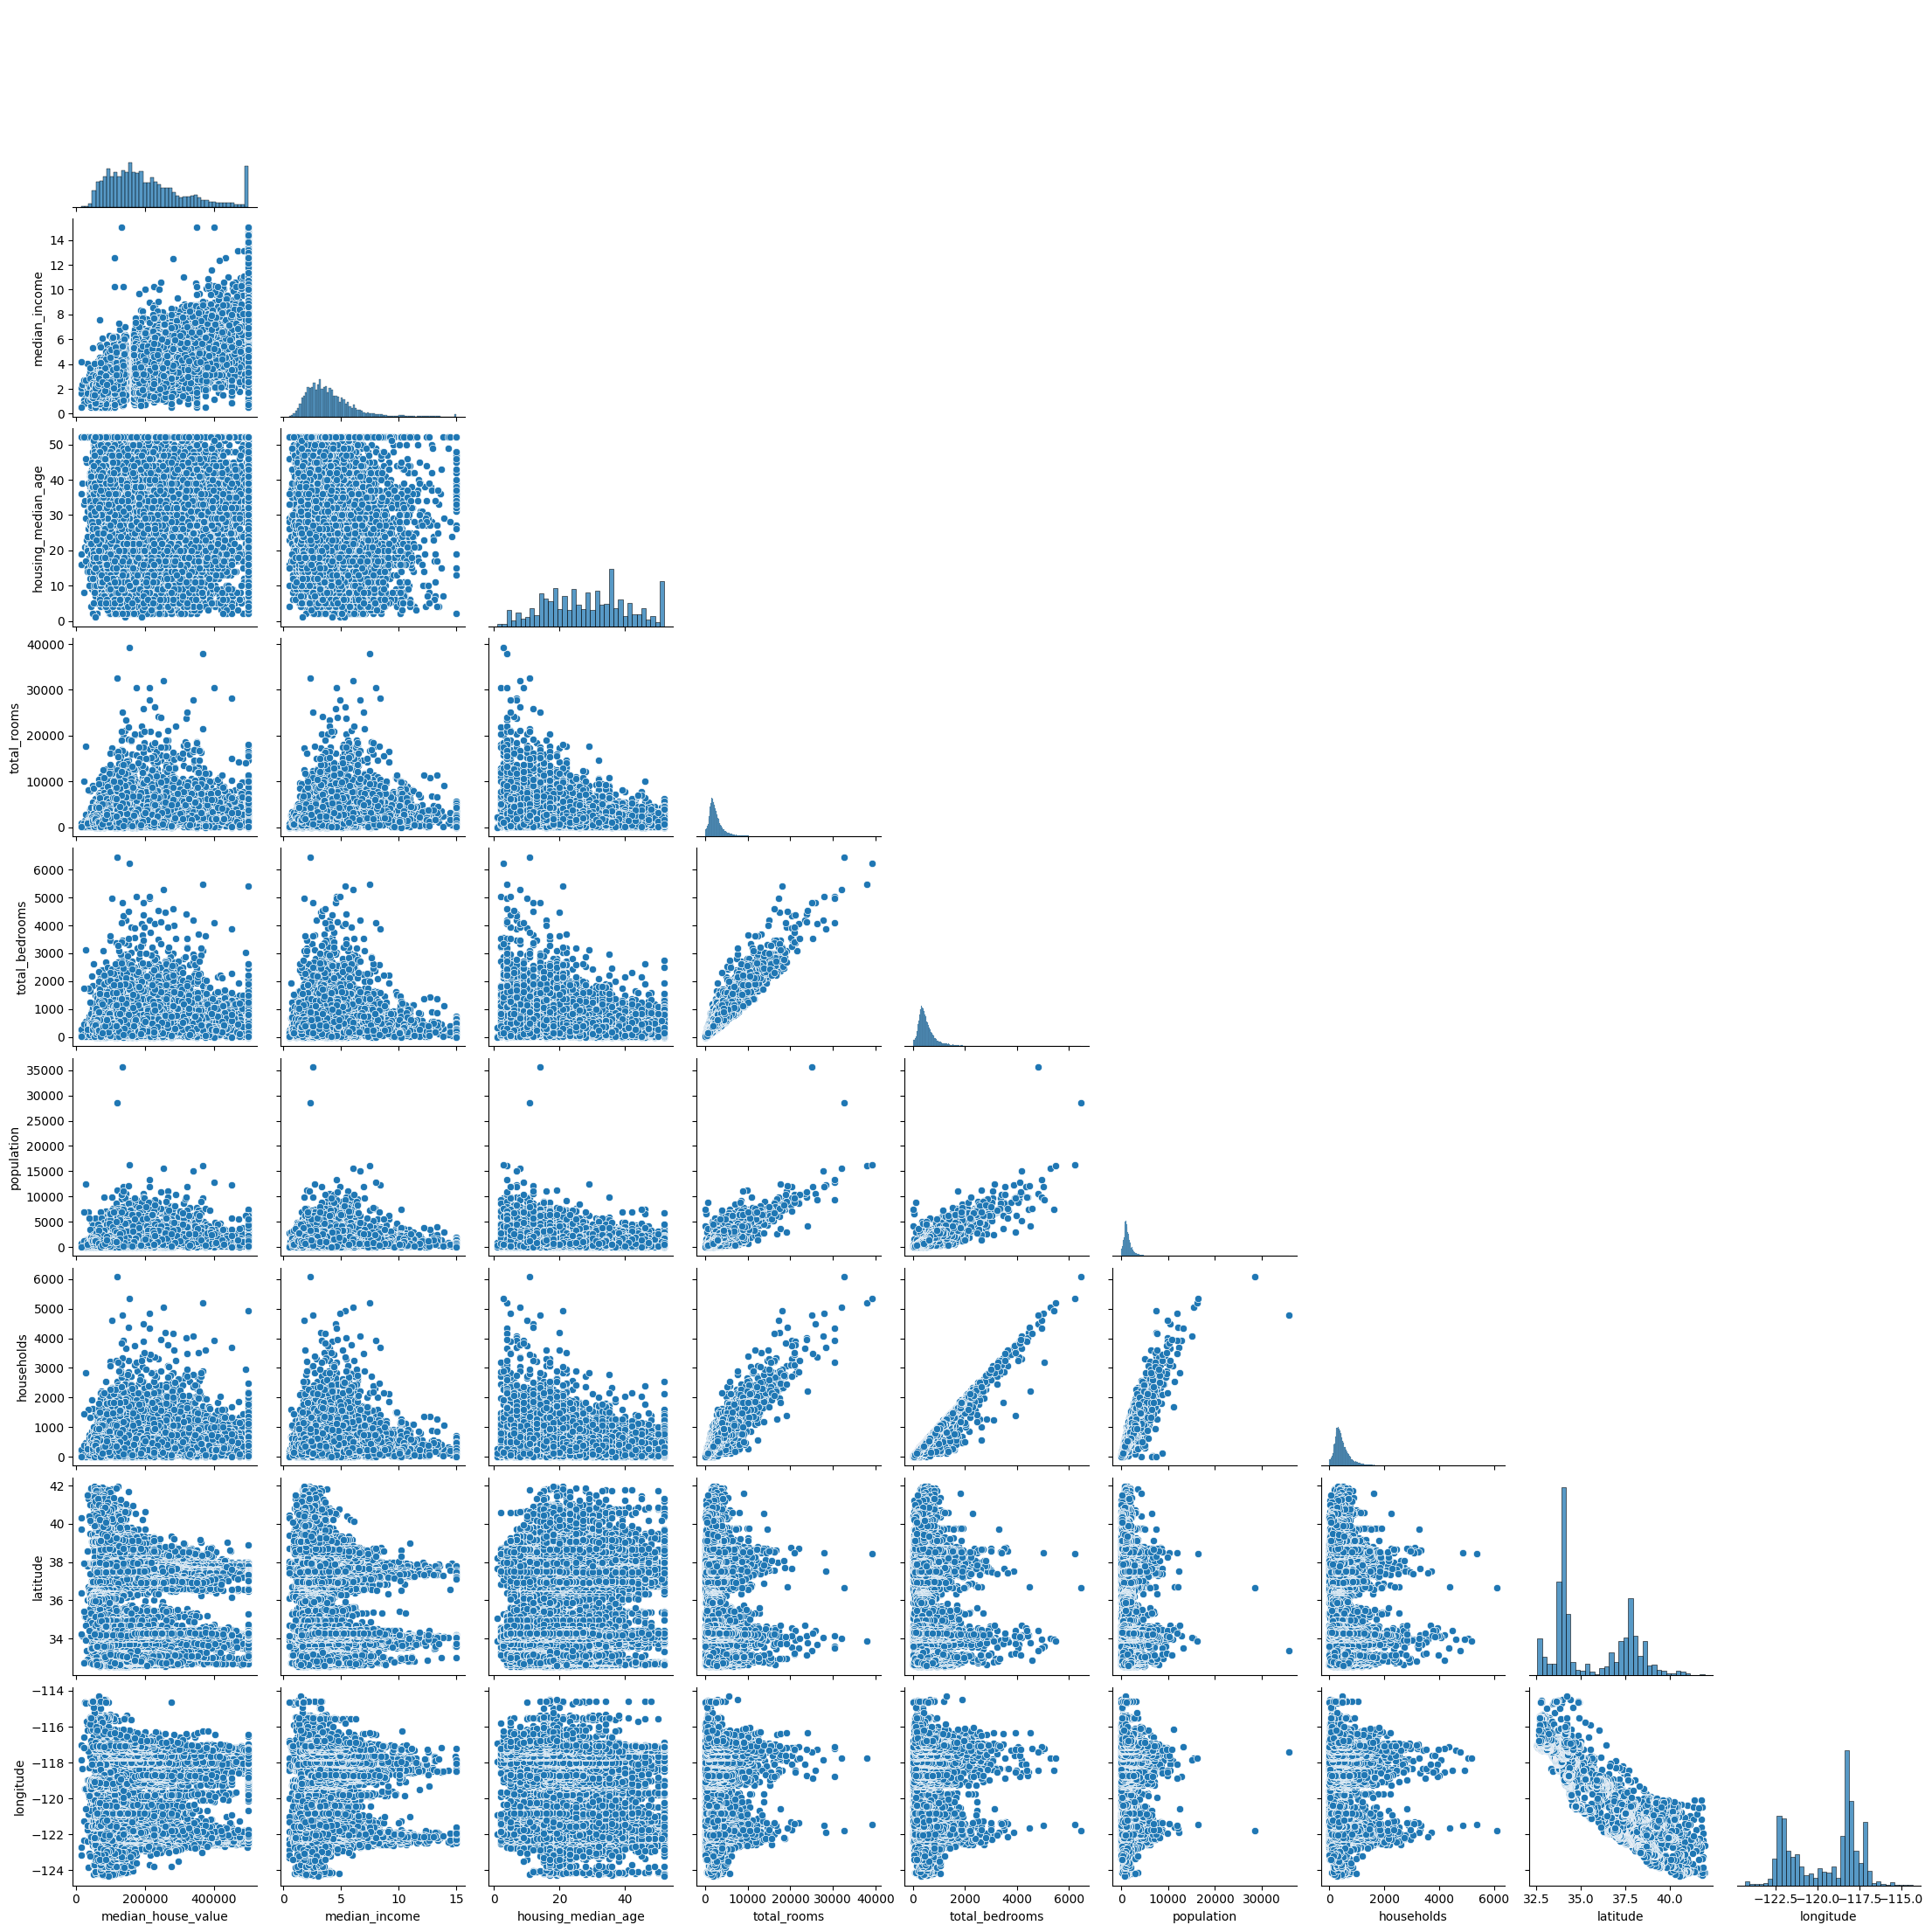

In [ ]:
houses_corrupted.hist(bins=50, figsize=(20,15))

sns.pairplot(houses_corrupted, kind='scatter', corner=True)

Histogram:

It is visible that every feature are right-skewed except `latitude`, `longitude` and `housing_median_age`. `median_house_value` shows a skewed distribution with most values below 250,000. The 500,000 cap is evident here as a sharp cutoff.
`median_income` distribution is right-skewed, with most values between 0 and 10. There are few instances of very high incomes, which could be outliers.
`housing_median_age` distribution is somewhat uniform, but there is a concentration of properties built around certain periods, particularly at the higher end (50 years). `total_rooms`, `total_bedrooms`, and `population` features have extreme right skewness. Most values cluster near zero, but a few points extend into the tens or hundreds of thousands.

Scatterplot:

There is a clear positive trend between `median_income` and `median_house_value`, suggesting that income strongly influences house prices. This could be a key predictor for modeling.
There is a noticeable cap on `median_house_value` at approximately 500,000. This could indicate a limit imposed on the target variable, which might need handling during predictive modeling.
As the number of `total_rooms` increases, both `total_bedrooms` and `population` increase proportionally.
This suggests multicollinearity, where one feature might not add significant value if the others are already considered.
latitude and longitude form distinct clusters, indicating geographical groupings. These clusters might correspond to different regions and could have different patterns of housing prices.

Interesting Observations:

The clustering seen in `latitude` and `longitude` aligns with expected geographical trends, potentially reflecting housing density or proximity to urban centers.
Strong correlations among `total_rooms`, `total_bedrooms`, and `households` highlight the potential for dimensionality reduction or feature engineering to avoid redundancy in modeling. Latitude and longitude are geogreaphical coordinates hence they are correlated with each other.

Extra Insights:

Properties `housing_median_age` with higher median ages appear to be more evenly distributed in terms of other features but may correlate differently with `median_house_value`. This could warrant further investigation into whether age adds unique predictive value.

We can use MAD to address and analyze outliers for features like `total_rooms`, `population`, and `median_income`.

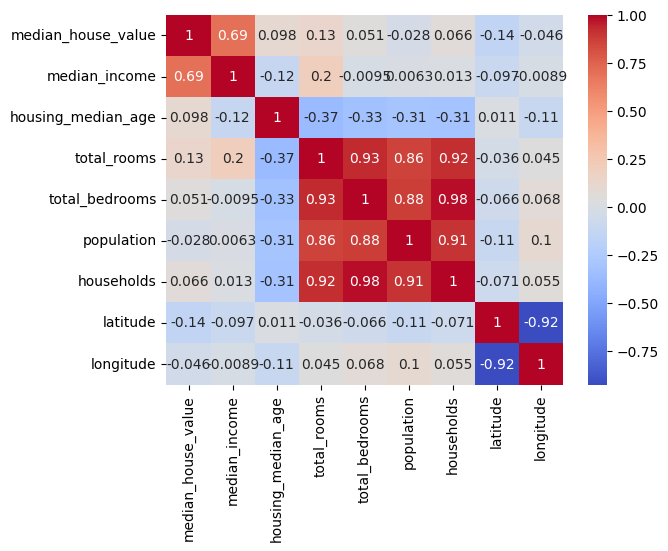

In [ ]:
sns.heatmap(houses_corrupted.corr(), annot=True, cmap="coolwarm")
plt.show()

We can calculate the MAD for a more robust, quantitative assessment of outliers. Since almost every features have skewness, using median and MAD are helpful since they are less affected by outliers. To get MAD for each features:

In [ ]:
house_MAD = pd.DataFrame(columns = houses_corrupted.columns)
mads = []
for attribute in houses_corrupted.columns:
  mad = 1.483 * abs(houses_corrupted[attribute] - houses_corrupted[attribute].median()).median()
  mads.append(mad)
house_MAD.loc[0] = mads
print(house_MAD)

   median_house_value  median_income  housing_median_age  total_rooms  \
0            101437.2       1.660515              13.347     1181.951   

   total_bedrooms  population  households  latitude  longitude  
0         241.729     670.316     223.933   1.82409    1.89824  


`median_house_value`:
A MAD value here of 101437.2 suggests significant variation in house prices. Since this feature likely exhibits a right-skewed distribution, the high MAD indicates a large spread between lower-value homes and a few very expensive properties.

`median_income`:
The MAD value of 1.66 suggests that most regions have median incomes within a narrow range, though the presence of a few regions with much lower or higher incomes may cause outliers. As income distributions are often skewed, MAD here helps identify areas with unusually high or low incomes.

`housing_median_age`:
The MAD of 13.35 indicates moderate variation in the age of houses across regions, with most regions having houses that are about the same age. There may be a few areas with notably older or newer homes.

`total_rooms`:
A MAD of 1181.95 suggests that the number of rooms in homes varies widely. Some homes may have many rooms, while others have few, but there might be a larger concentration of homes with fewer rooms, creating the variation in MAD.

`total_bedrooms`:
The MAD value of 241.73 indicates that the number of bedrooms per home varies significantly across the dataset. Larger homes with more bedrooms will pull this value up, but many homes may have fewer bedrooms.

`population`:
A MAD value of 670.32 shows that population sizes in regions vary considerably. Some regions have very high population densities, while others are sparsely populated, leading to a wide spread in this feature.

`households`:
With a MAD value of 223.93, the number of households per region also varies considerably, but the spread is narrower than population, suggesting that population size may not always correlate linearly with the number of households.

We can deduce here by small MAD value for both latitude and longitude means locations are consistent range in geographic data. Features such as total_rooms and population have high MAD values, suggesting the presence of significant outliers, possibly due to highly populated regions or housing areas with extreme room counts.

Using EDA, we have identified features with missing values are `median_incom`e, `housing_median_age` and `population`	with 2064 values. Features with outliers are `median_house_value`, `median_income`, `total_rooms`, `total_bedrooms`, `population` and `households`.

### 2. Outlier Identification [10]
- Utilise a statistical outlier detection approach (i.e., **no** KNN, LOF, 1Class SVM)
- Utilise an algorithmic outlier detection method of your choice
- Compare results and decide what to do with identified outleirs
  - Include graphs, statistics, and written descriptions as appropriate
- Explain what you are doing, and why your analysis is appropriate
- Comment on benefits/detriments of statistical and algorithmic outlier detection approaches


In our data, we have address some outliers but it would be better to provide some visualization in order todecide on how to deal with them. I use boxplot which is easy to implement and understand using quartiles. Points outside the "whiskers" in a boxplot are considered outliers.

Statistical methods rely on mathematical models based on assumptions about the underlying data distribution (e.g., normal distribution). These methods primarily focus on identifying points that significantly deviate from the majority of the data based on some statistical criteria.

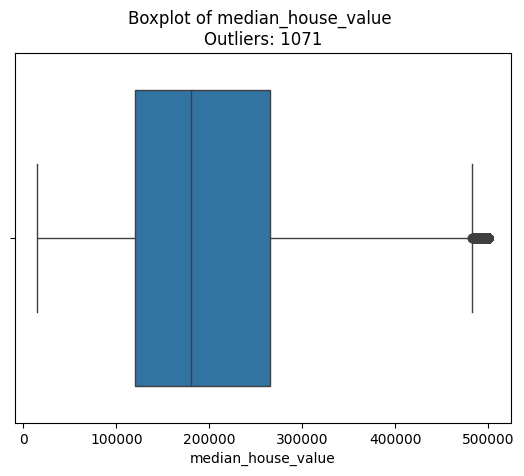

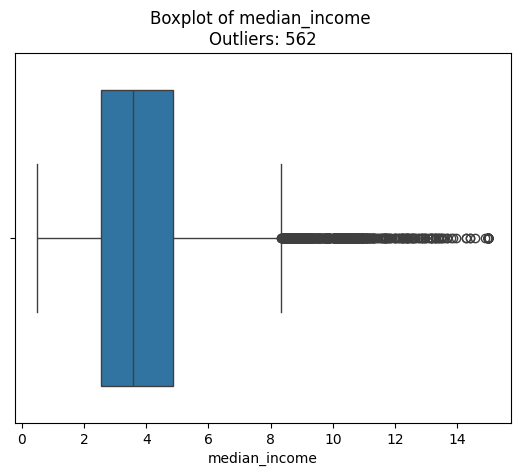

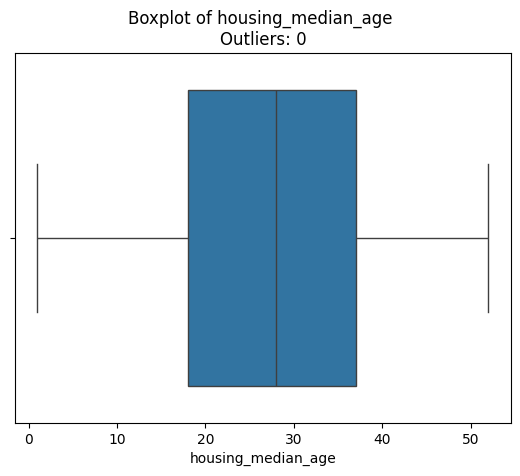

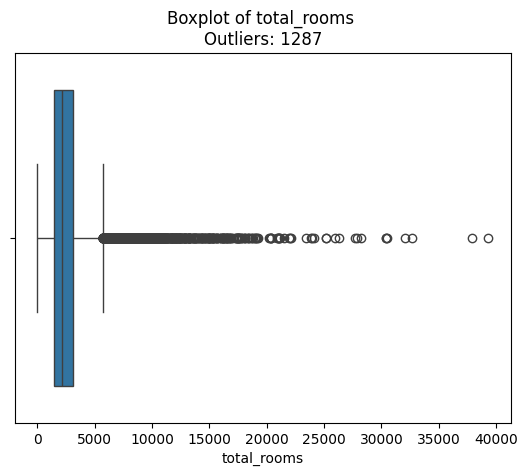

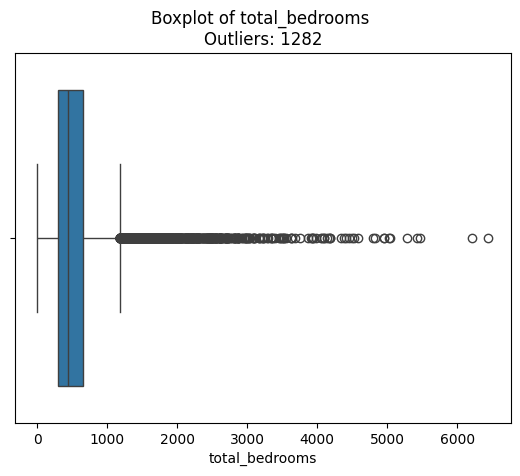

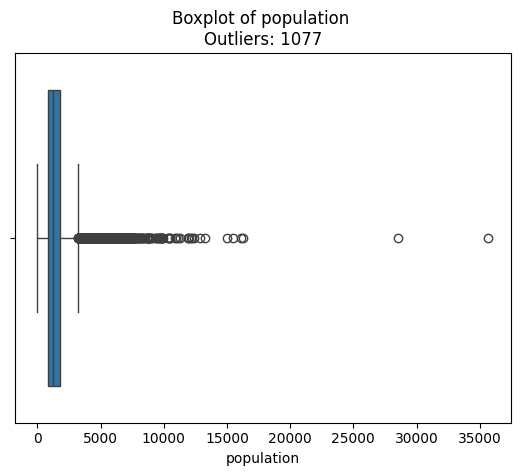

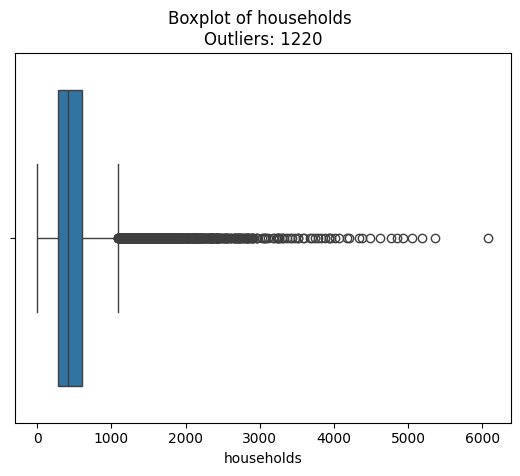

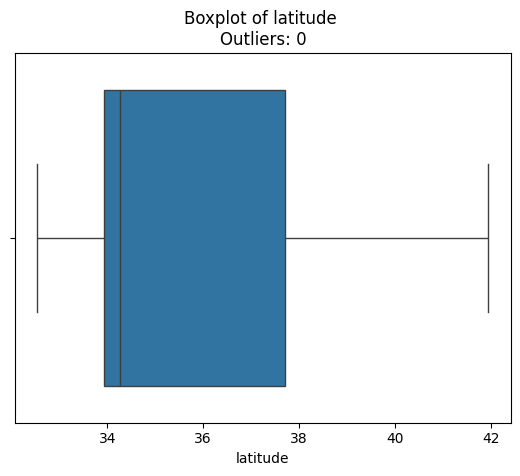

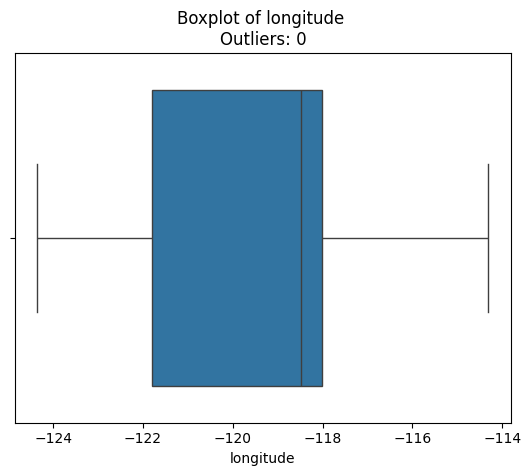

In [ ]:
# Identify potential outliers using box plots for numerical features
for col in ["median_house_value","median_income","housing_median_age","total_rooms","total_bedrooms","population","households","latitude","longitude"]:
    sns.boxplot(x=houses_corrupted[col])
    outliers_count = len(houses_corrupted[houses_corrupted[col] > houses_corrupted[col].quantile(0.75) + 1.5 * (houses_corrupted[col].quantile(0.75) - houses_corrupted[col].quantile(0.25))])
    plt.title(f"Boxplot of {col} \nOutliers: {outliers_count}")
    plt.show()

Outliers:

There are extreme values for `total_rooms` and `population` features, as seen by scattered points far from the main clusters. Following logical interpretation, we can assume rooms is the same as bedrooms and population with households. These outliers could represent highly populated areas or properties with an unusually high number of rooms. Several `median_house_value` points lie at the price cap of 500,000, which may bias any regression models if not handled appropriately. `median_income` has highly right-skewed distribution with the majority of incomes under 10.

Next, we use algorithmic outlier detection using Isolation Forest which is a common and easy technique. Algorithmic approaches do not rely on specific distributional assumptions and can adapt to more complex, multi-dimensional data. They often use machine learning algorithms to detect outliers. This algorithm isolates data points by randomly selecting features and splitting them to create "isolation trees." Outliers are those points that can be isolated with fewer splits, as they are far from the main data mass.


However, Isolation Forest require complete numerical datasets for their calculations. Missing values need to be addressed before applying these methods for outlier detection. If missing values is more than 30%, drop the column. Else, impute

In [ ]:
len(houses_corrupted), len(houses_corrupted.dropna())
houses_corrupted.isnull().sum() / len(houses_corrupted.index) * 100

median_house_value     0.0
median_income         10.0
housing_median_age    10.0
total_rooms            0.0
total_bedrooms         0.0
population            10.0
households             0.0
latitude               0.0
longitude              0.0
dtype: float64

In [ ]:
print("missing values in house: {0:.3}%".format(houses_corrupted['population'].isnull().sum()  / len(houses_corrupted) * 100))


missing values in house: 10.0%


By using `.dropna()`, we would lose 5,581 rows, which is approximately 27% of the dataset. This is a significant portion of the data, so dropping these rows might not be ideal. Rather than dropping such a large amount of data, you could consider using imputation techniques to fill in the missing values for the columns `median_income`, `housing_median_age`, and `population`.

In [ ]:
houses_corrupted['median_income'] = houses_corrupted['median_income'].fillna(houses_corrupted['median_income'].mean())
houses_corrupted['housing_median_age'] = houses_corrupted['housing_median_age'].fillna(houses_corrupted['housing_median_age'].median())
houses_corrupted['population'] = houses_corrupted['population'].fillna(houses_corrupted['population'].mean())

len(houses_corrupted), len(houses_corrupted.dropna())

(20640, 20640)

By imputing with mean for skewed distribution and median for normal, Now we can work with outlier method

Text(0.5, 1.02, 'Outliers: 2064')

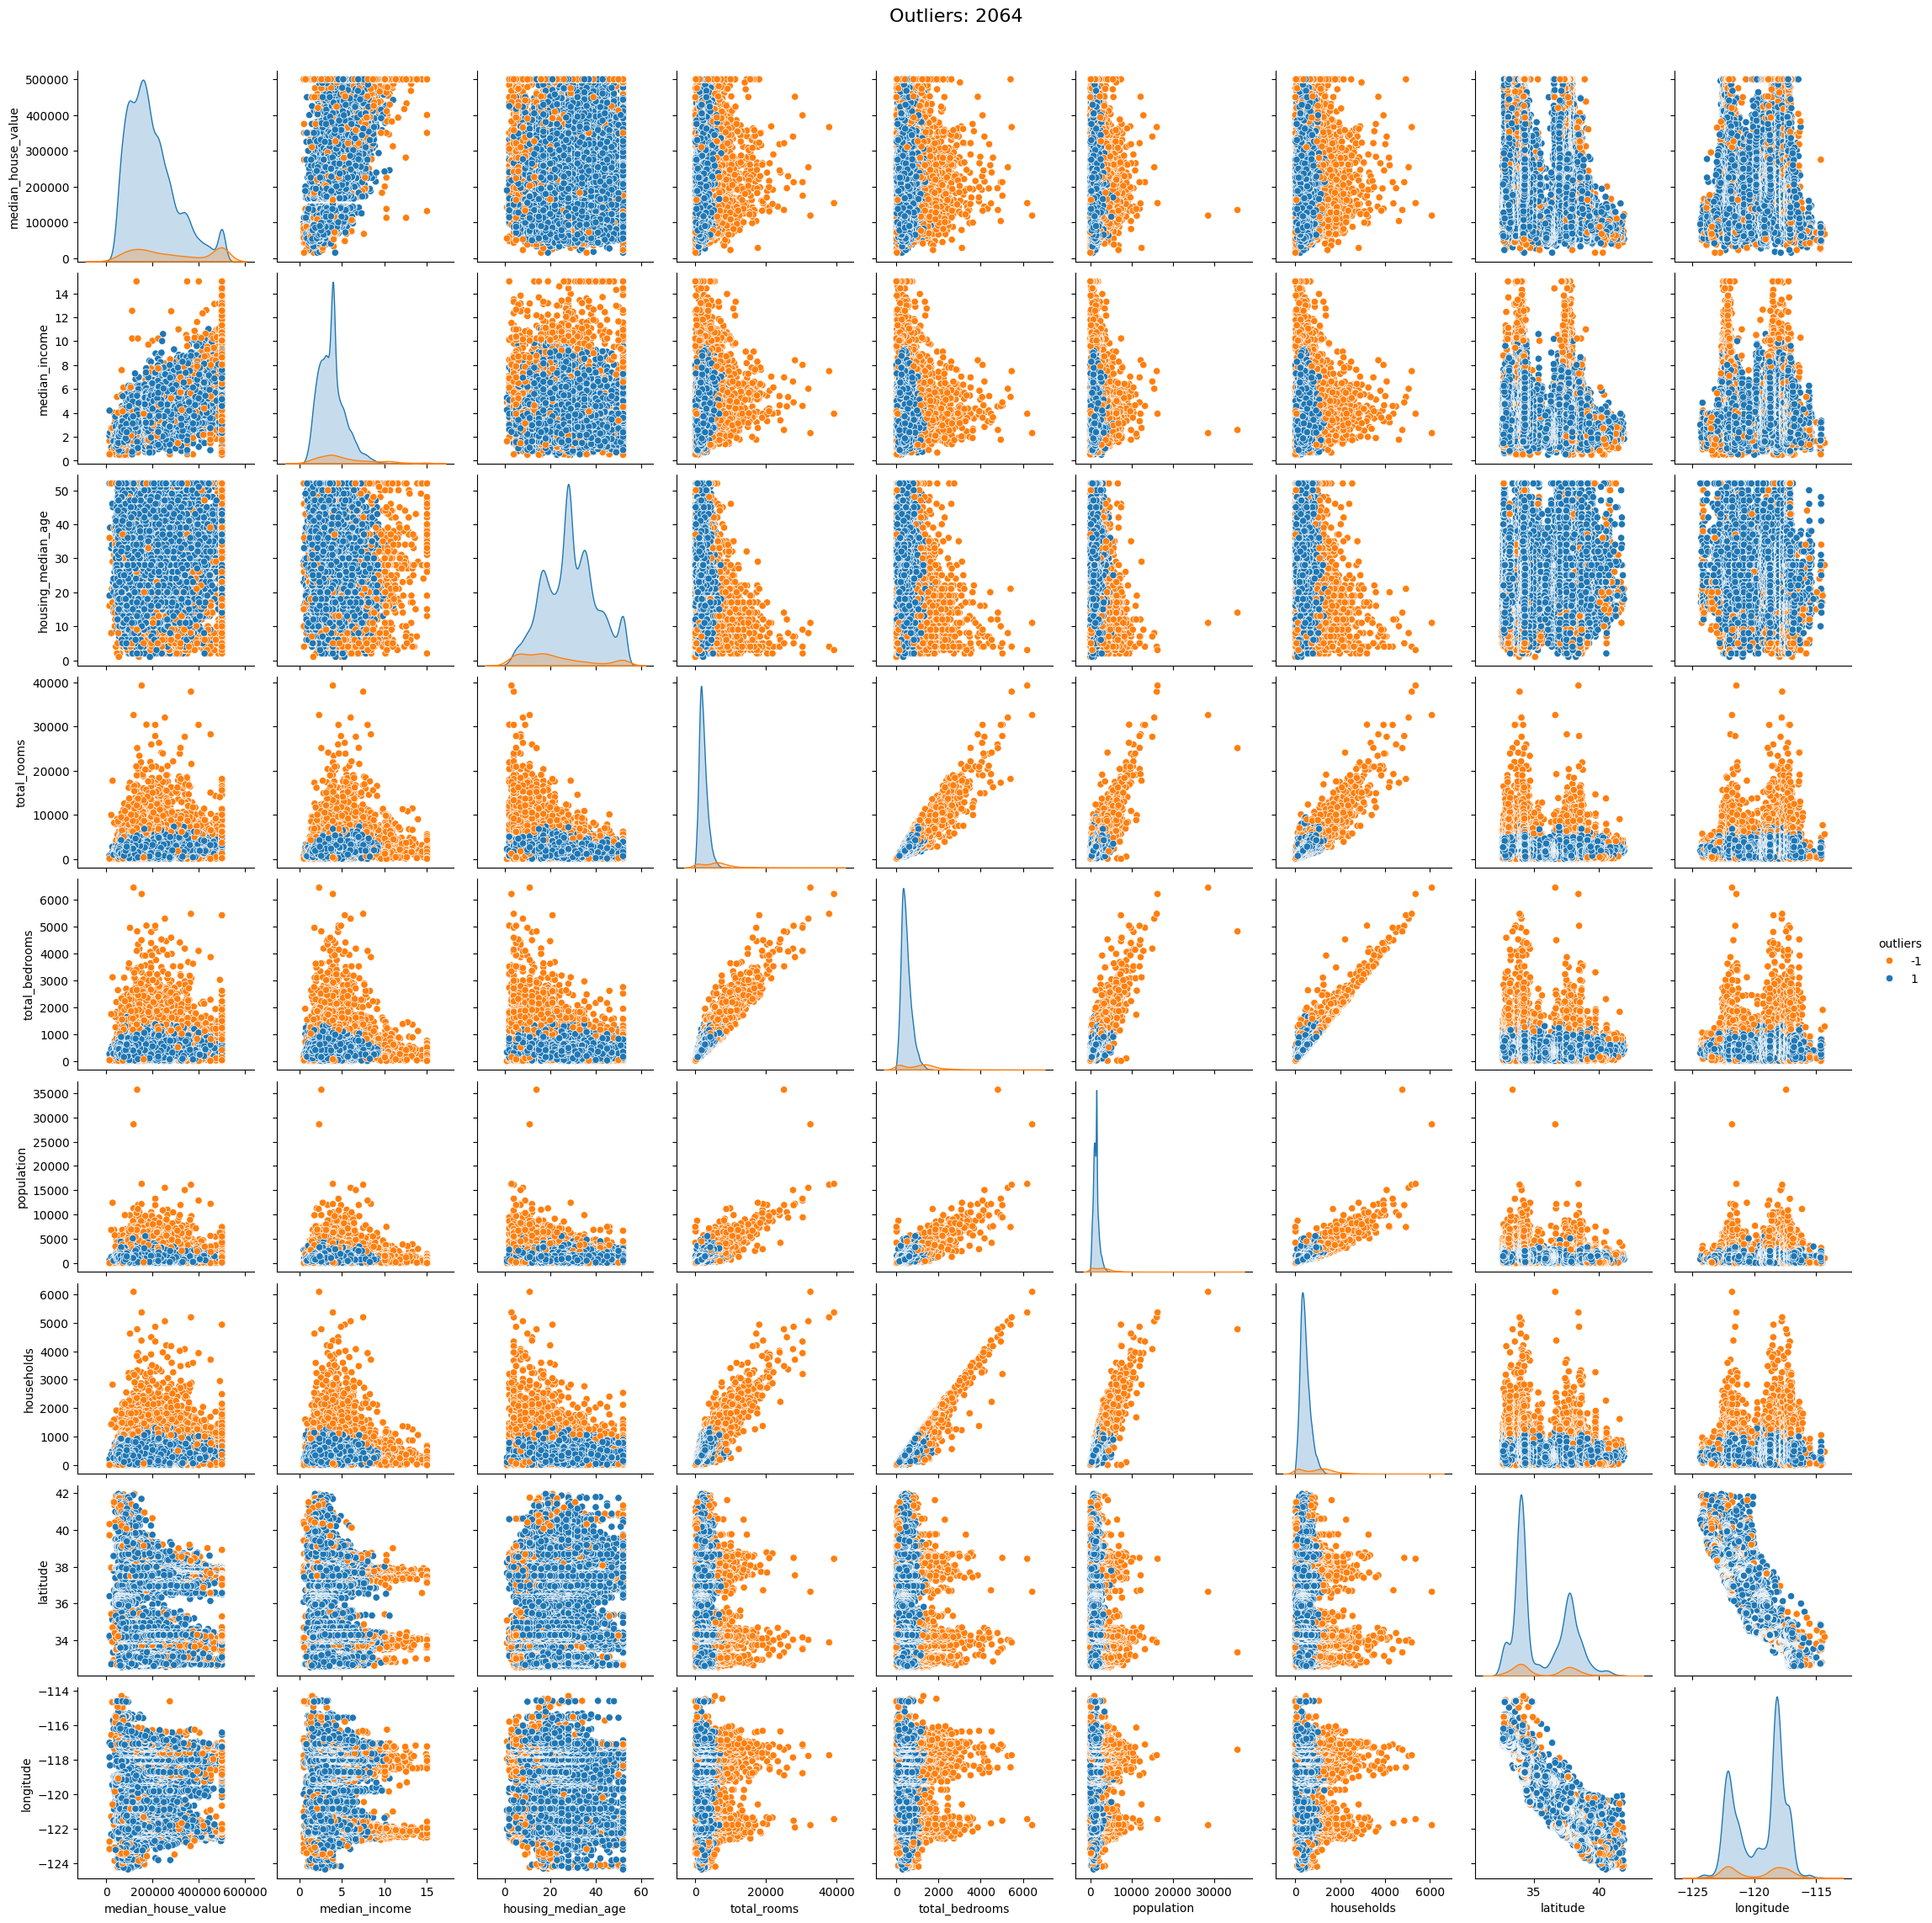

In [ ]:
from sklearn.ensemble import IsolationForest

column = ["median_house_value","median_income","housing_median_age","total_rooms","total_bedrooms","population","households","latitude","longitude"]
# Initialize the Isolation Forest model
model_IF = IsolationForest(contamination=0.05, random_state=42)
# Fit the model to the data
model_IF.fit(houses_corrupted[column])
houses_corrupted['anomaly_scores'] = model_IF.decision_function(houses_corrupted[column])
houses_corrupted['outliers'] = model_IF.predict(houses_corrupted[column])

palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(houses_corrupted, vars=column, hue='outliers', palette=palette)

outliers_count = len(houses_corrupted[houses_corrupted['outliers'] == -1])
plt.suptitle(f"Outliers: {outliers_count}", fontsize=16, y=1.02)


In [ ]:
from sklearn.metrics import accuracy_score
scores_prediction = model_IF.decision_function(houses_corrupted[column])
y_pred = model_IF.predict(houses_corrupted[column])
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y = houses_corrupted['population']
# Print the accuracy in separating outliers or anomalies
houses_corrupted['is_outlier'] = (houses_corrupted['anomaly_scores'] < -0.1).astype(int)
y = houses_corrupted['is_outlier']
# Print the accuracy in separating outliers or anomalies
print("Accuracy in finding outliers:",accuracy_score(y,y_pred))

Accuracy in finding outliers: 0.9173449612403101


In [ ]:
# Calculate basic statistics
print(houses_corrupted[column].describe())

# Calculate IQR for each column
Q1 = houses_corrupted[column].quantile(0.25)
Q3 = houses_corrupted[column].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower whiskers for each column
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Get the number of outliers detected by Boxplot (based on IQR)
outliers_boxplot = houses_corrupted[((houses_corrupted[column] > upper_whisker) | (houses_corrupted[column] < lower_whisker)).any(axis=1)]

# Get the number of outliers detected by Isolation Forest
outliers_if = houses_corrupted[houses_corrupted['outliers'] == -1]

print(f"Boxplot outliers: {len(outliers_boxplot)}")
print(f"Isolation Forest outliers: {len(outliers_if)}")

       median_house_value  median_income  housing_median_age   total_rooms  \
count        20640.000000   20640.000000        20640.000000  20640.000000   
mean        206855.816909       3.929958           28.291764   2635.763081   
std         115395.615874       1.863490           11.939462   2181.615252   
min          14999.000000       0.499900            1.000000      2.000000   
25%         119600.000000       2.661800           19.000000   1447.750000   
50%         179700.000000       3.806800           28.000000   2127.000000   
75%         264725.000000       4.679625           36.000000   3148.000000   
max         500001.000000      15.000100           52.000000  39320.000000   

       total_bedrooms    population    households      latitude     longitude  
count    20640.000000  20640.000000  20640.000000  20640.000000  20640.000000  
mean       537.898014   1488.069283    499.539680     35.631861   -119.569704  
std        421.247906   1110.512218    382.329753      2.

### Comparing Results and Deciding What to Do with Identified Outliers

Given the summary statistics and outlier counts from the **boxplot method** and the **Isolation Forest method**, we can now compare the results and decide on how to handle the identified outliers.

#### 1. **Descriptive Statistics Summary**:
- **Median House Value**: The range of `median_house_value` spans from 14,999 to 500,001, with a mean of 206,855 and a standard deviation of 115,396. There is a large variance, indicating the presence of high-value homes which could be outliers.
- **Median Income**: This feature has a range from 0.5 to 15.0, with a mean of 3.93 and a standard deviation of 1.86, suggesting that extreme values may also be present at the lower end.
- **Population**: The `population` feature has a wide range from 3 to 35,682, with a mean of 1,488 and a standard deviation of 1,110. Extreme values could indicate outliers in certain areas, especially larger populations.
- **Total Rooms, Total Bedrooms, Households**: These features also show large ranges and significant standard deviations, implying the potential for outliers in low and high values.

#### 2. **Boxplot vs. Isolation Forest**:
- **Outliers identified by Boxplot**:
    - Total: **3,208 outliers**
    - Boxplots show outliers based on the IQR rule. These are typically extreme values at the lower or upper bounds of each feature distribution.
    - **Boxplot Outliers** are typically flagged for features such as `median_house_value`, `total_rooms`, and `population`, where the extreme values are significantly different from the rest of the dataset.

- **Outliers identified by Isolation Forest**:
    - Total: **2,064 outliers**
    - Isolation Forest detects outliers by isolating points in feature space and considers the multidimensional relationships between the features. It could identify outliers that might not be flagged by the boxplot method, especially in high-dimensional data.
    - **Isolation Forest Outliers** are typically those isolated in a sparse region of the feature space, reflecting more complex, multivariate anomalies.

### 3. **Analysis of Overlap and Differences**:
- **Overlap**: Both methods identify a significant number of outliers, but there is some overlap (outliers detected by both methods) as well as distinct outliers detected by only one method.
  - The boxplot method tends to focus on extreme values in single dimensions, while the Isolation Forest considers relationships between features, which might explain the difference in the number of outliers detected.
  - The **boxplot method** detects 1,144 more outliers than Isolation Forest, which could indicate that some extreme values are seen as outliers by the IQR rule but are not considered anomalous by the Isolation Forest method, possibly because they follow natural patterns in the data.

#### 4. **What to Do with Identified Outliers?**

1. **Removal of Outliers**:
   - **Boxplot Outliers**: These could represent extreme cases (e.g., extremely high-income regions, very high-value homes) or errors. If these extreme outliers seem like erroneous entries or have a disproportionate impact on model performance (e.g., skewing distributions), they should be removed.
   - **Isolation Forest Outliers**: Isolation Forest detects anomalies based on feature relationships, so the outliers detected here might indicate more complex anomalies. If the points flagged by Isolation Forest are valid data (e.g., high-income neighborhoods), they may need to be kept in the dataset, especially if the goal is to capture the full range of variation.
  

2. **Imputation of Outliers**:
   - If removing outliers is not preferred (for instance, in cases where extreme values are legitimate but rare), imputing outliers with more reasonable values (e.g., replacing extreme `median_house_value` values with the mean or median) could be a viable option.


3. **Retain Outliers**:
   - If outliers are genuinely representative of rare but important instances (e.g., ultra-high-value properties), it might be better to keep them in the dataset and ensure that their effect is mitigated in subsequent analysis or modeling.

4. **Log Transformation**:
   - For features like `median_house_value`, which have extreme high-end values, applying a **log transformation** can reduce the influence of outliers while preserving the data's overall structure. This transformation can make the distribution more symmetric and less sensitive to extreme values.


#### 5. **Benefits and Detriments of the Approaches**

- **Boxplot Method (Statistical Approach)**:
    - **Benefits**:
        - Simple and easy to interpret.
        - Effective for univariate outlier detection.
        - Can be done quickly without complex computation.
    - **Detriments**:
        - Ignores interactions between features.
        - May flag legitimate data points as outliers (e.g., high-income areas).
        - Limited for multivariate datasets.

- **Isolation Forest (Algorithmic Approach)**:
    - **Benefits**:
        - Can detect complex outliers in high-dimensional spaces.
        - Does not assume any specific data distribution.
        - Can detect both univariate and multivariate outliers.
    - **Detriments**:
        - Computationally more expensive than the boxplot method.
        - May detect anomalies that aren't actually outliers (i.e., it may be too aggressive).
        - Requires setting the contamination parameter, which can influence results.

### Conclusion

Both methods provide valuable insights into the presence of outliers, but they serve different purposes. The **boxplot method** is simple and interpretable, making it effective for detecting obvious extreme values, while the **Isolation Forest** method captures more nuanced anomalies that arise from interactions between features. Based on the analysis, you may decide to **remove, impute, or retain** outliers depending on their nature and impact on your analysis, ensuring that the final dataset accurately represents the underlying patterns in the data.

### 3. Imputation [10]
- Identify which features should be imputed and which should be removed
  - Provide a written rationale for this decision
- Impute the missing records using KNN imputation
- Impute the missing records using MICE imputation
- Compare both imputed datasets feature distributions against each other and the non-imputed data
- Build a regressor on all thre datasets
  - Use regression models to predict house median price
  - Compare regressors of non-imputed data against imputed datas
  - **Note**: If you're struggling to compare against the original dataset focus on comparing the two imputed datasets against each other


In [ ]:
# Use this dataset for comparison against the imputed datasets
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [ ]:
# Checking for missing values
missing_values = houses.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


<Axes: >

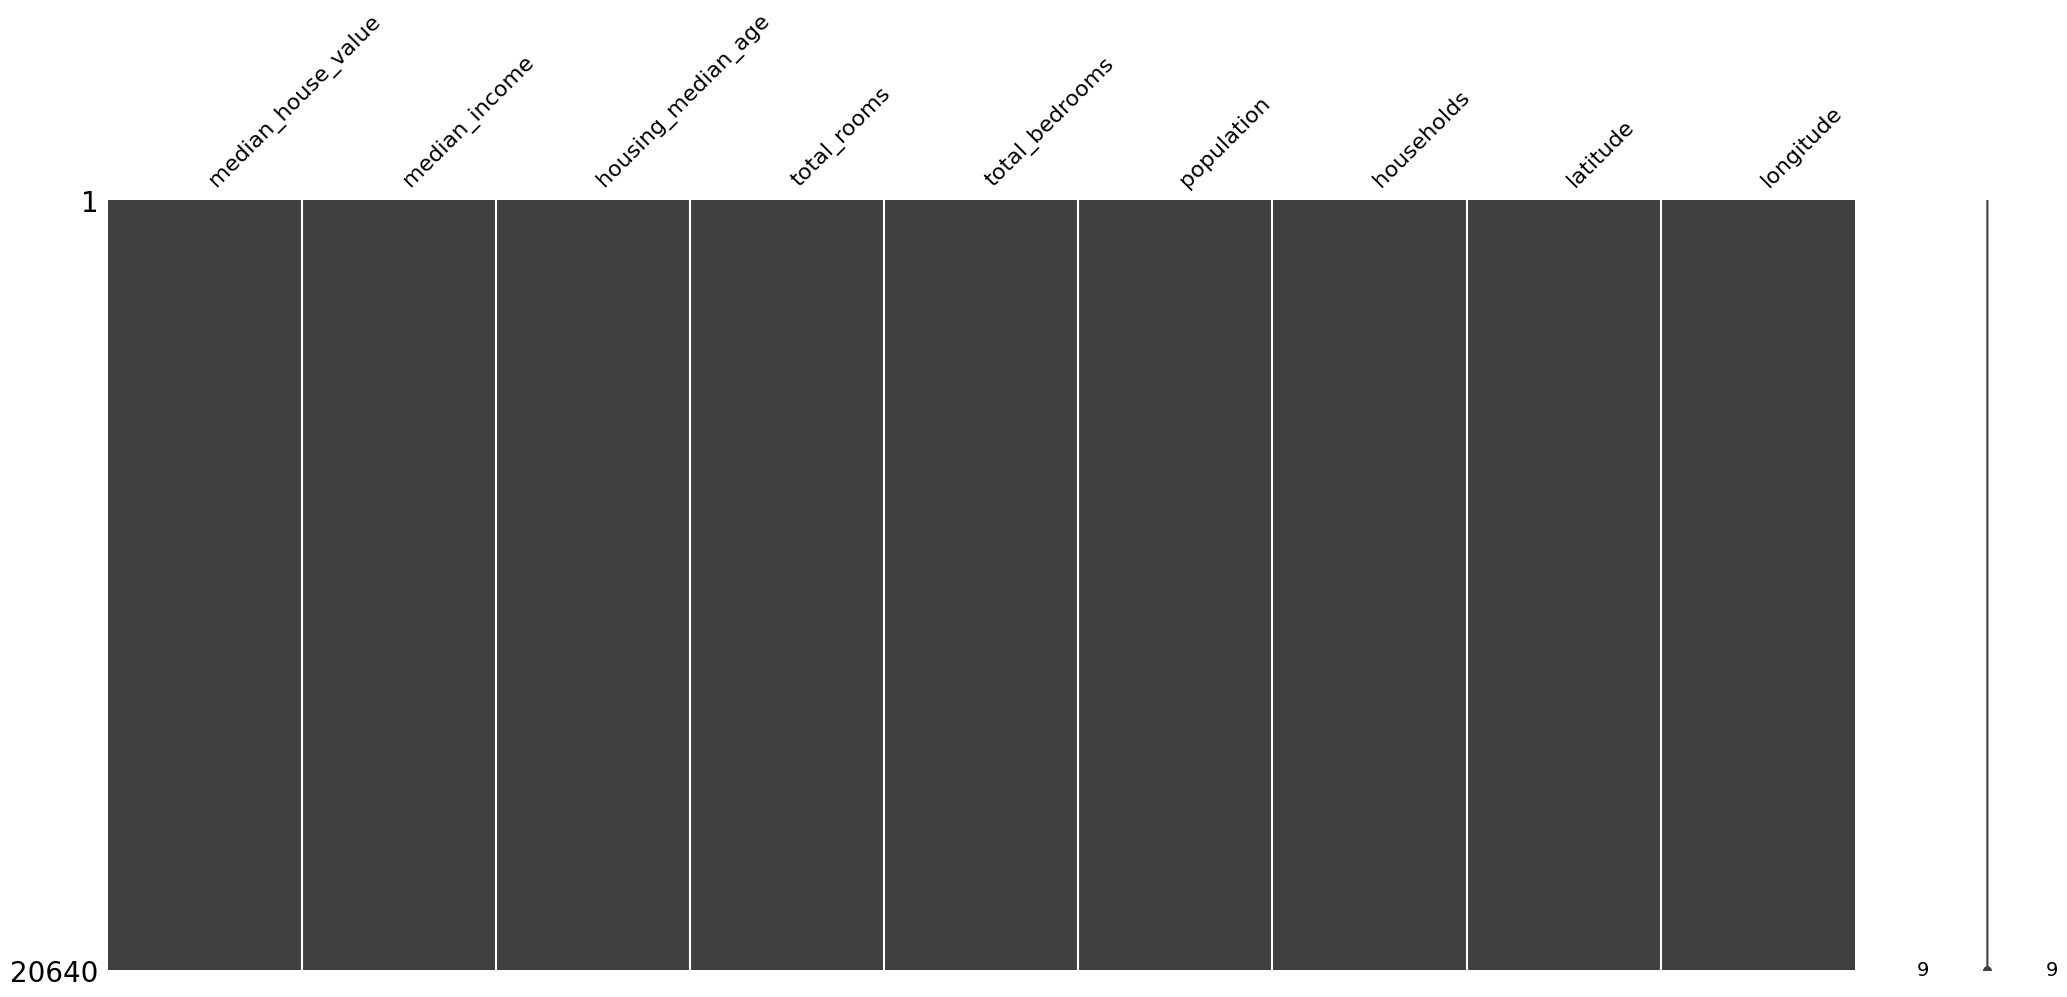

In [ ]:
%matplotlib inline
msno.matrix(houses)

Identify which features should be imputed and which should be removed. Provide a written rationale for this decision


Rationale: All features are numerical and potentially relevant. No feature has a high enough percentage of missing values to warrant removal.  We will impute all.

Impute the missing records using KNN imputation

In [ ]:
# Loading in the corrupted dataset to be used in analysis and imputation
houses_corrupted = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv', header=0)
# Remove an artifact from the dataset
houses_corrupted.drop(["Unnamed: 0"], axis=1, inplace=True)
houses_corrupted.head()

median_house_value  median_income  housing_median_age  total_rooms  \
0            452600.0         8.3252                41.0        880.0   
1            358500.0         8.3014                21.0       7099.0   
2            352100.0         7.2574                52.0       1467.0   
3            341300.0         5.6431                52.0       1274.0   
4            342200.0         3.8462                52.0       1627.0   

   total_bedrooms  population  households  latitude  longitude  
0           129.0       322.0       126.0     37.88    -122.23  
1          1106.0      2401.0      1138.0     37.86    -122.22  
2           190.0         NaN       177.0     37.85    -122.24  
3           235.0         NaN       219.0     37.85    -122.25  
4           280.0       565.0       259.0     37.85    -122.25

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
houses_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(houses_corrupted), columns=houses_corrupted.columns)


knn is good now MICE

In [ ]:
# MICE Imputation
mice_imputer = IterativeImputer(random_state=0, max_iter=10, estimator=LinearRegression())
houses_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(houses_corrupted), columns=houses_corrupted.columns)


Compare both imputed datasets feature distributions against each other and the non-imputed data


In [ ]:
# Feature Distribution Comparison
# (Example using histograms for 'median_house_value')
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(houses['median_house_value'], bins=30, alpha=0.5, label='Original')
plt.title('Original Data')
plt.xlabel('median_house_value')

plt.subplot(1, 3, 2)
plt.hist(houses_knn_imputed['median_house_value'], bins=30, alpha=0.5, label='KNN Imputed')
plt.title('KNN Imputed Data')
plt.xlabel('median_house_value')

plt.subplot(1, 3, 3)
plt.hist(houses_mice_imputed['median_house_value'], bins=30, alpha=0.5, label='MICE Imputed')
plt.title('MICE Imputed Data')
plt.xlabel('median_house_value')

plt.tight_layout()
plt.show()


Build a regressor on all three datasets.

Use regression models to predict house median price

Compare regressors of non-imputed data against imputed datas.

In [ ]:
# Regression Modeling
# Define features (X) and target (y)
X_original = houses.drop('median_house_value', axis=1)
y_original = houses['median_house_value']

X_knn = houses_knn_imputed.drop('median_house_value', axis=1)
y_knn = houses_knn_imputed['median_house_value']

X_mice = houses_mice_imputed.drop('median_house_value', axis=1)
y_mice = houses_mice_imputed['median_house_value']

# Train/Test split
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)
X_train_mice, X_test_mice, y_train_mice, y_test_mice = train_test_split(X_mice, y_mice, test_size=0.2, random_state=42)

# Initialize and train the regressor (Linear Regression example)
model_orig = LinearRegression()
model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = model_orig.predict(X_test_orig)

model_knn = LinearRegression()
model_knn.fit(X_train_knn,y_train_knn)
y_pred_knn = model_knn.predict(X_test_knn)

model_mice = LinearRegression()
model_mice.fit(X_train_mice,y_train_mice)
y_pred_mice = model_mice.predict(X_test_mice)

# Evaluate the model
mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
mse_knn = mean_squared_error(y_test_knn, y_pred_knn)
mse_mice = mean_squared_error(y_test_mice, y_pred_mice)

print(f"Original Data MSE: {mse_orig}")
print(f"KNN Imputed Data MSE: {mse_knn}")
print(f"MICE Imputed Data MSE: {mse_mice}")

1. Feature Distribution Analysis
The histogram comparison of the median_house_value shows that the KNN- and MICE-imputed datasets retain similar distributions to the original data.
This suggests that the imputation methods effectively restored the data’s statistical properties, at least for this feature.
2. Model Performance
The MSE values for all datasets are very close, with slight variations:
Original Data: 4,918,556,441.48
KNN Imputed Data: 4,819,582,594.84
MICE Imputed Data: 4,819,582,594.84
The near-identical MSE for KNN and MICE suggests that both methods performed similarly and preserved the predictive quality of the data.
3. Key Observations
Original vs. Imputed Datasets: The imputed datasets (KNN, MICE) show marginally better MSE than the original dataset. This could be due to minor noise or variance reductions introduced by the imputation process.
Imputation Choice: Both KNN and MICE appear effective, but the choice between them could depend on computational complexity (MICE tends to be slower) or interpretability.
Suggested Additions to Your Report
Explain the Histogram Trends:

Highlight how the imputed datasets' distributions closely match the original data, emphasizing the effectiveness of imputation.
Discuss MSE Results:

Address why KNN and MICE imputed datasets yield similar MSE values and slightly outperform the original dataset in this case.
Highlight Limitations:

Discuss potential limitations of imputation methods, such as how imputed values are approximations and may introduce biases in certain scenarios.
Future Work:

Propose testing more advanced imputation methods or other regression models to further explore the dataset’s predictive capacity.

### 4. Conclusions & Throughts [3]
- Disucss methods used for anomaly detection, pros/cons of each method
- Disucss challenges/difficulties in anomaly detection implementation
- Discuss methods used for imputation, pros/cons of each method
- Discuss challenges/difficulties in imputation implementation

## **4. Conclusions & Thoughts**

### **4.1 Methods Used for Anomaly Detection**

#### **4.1.1 Isolation Forest**
- **Pros**:
  - Efficient and scalable for high-dimensional datasets.
  - Handles anomalies without assumptions about data distribution.
- **Cons**:
  - Sensitive to hyperparameters, particularly the contamination rate.
  - Can struggle with datasets where anomalies are not well-separated from normal data.
- **Challenges**:
  - Determining an appropriate contamination parameter without labeled data.
  - Difficulties in visualizing or interpreting results for stakeholders with limited technical expertise.

#### **4.1.2 Statistical Approach (MAD or Z-Scores)**
- **Pros**:
  - Straightforward to implement and understand.
  - Thresholds are easy to explain, making the method accessible to non-experts.
- **Cons**:
  - Assumes data follows a normal distribution, which may not always hold true.
  - Ineffective for identifying outliers in non-linear relationships or multidimensional data.
- **Challenges**:
  - Selecting a robust threshold to balance over-detection and under-detection of anomalies.
  - Adapting the method for datasets where anomalies involve complex feature interactions.

---

### **4.2 Methods Used for Imputation**

#### **4.2.1 KNN Imputation**
- **Pros**:
  - Maintains local relationships between features by imputing based on similar data points.
  - Can handle non-linear relationships well.
- **Cons**:
  - Computationally expensive for large datasets, as it involves computing distances for every data point.
  - Risk of over-smoothing or introducing noise in datasets with high variability or sparse features.
- **Challenges**:
  - Selecting the optimal number of neighbors (`n_neighbors`) to avoid biased imputations.
  - Dealing with cases where neighboring points also contain missing values.

#### **4.2.2 MICE Imputation**
- **Pros**:
  - Iteratively models missing data, preserving relationships between features.
  - Provides more statistically valid imputations compared to simpler methods.
- **Cons**:
  - Computationally intensive, especially for large datasets or when using complex estimators.
  - Results depend heavily on the choice of the regression model used during iteration.
- **Challenges**:
  - Choosing the best base estimator (e.g., Linear Regression).
  - Addressing convergence issues in cases of highly correlated or complex data.

---

### **4.3 Challenges in Implementation**

#### **4.3.1 Anomaly Detection**
- Balancing the trade-off between false positives (misclassifying normal data as anomalies) and false negatives (failing to detect true anomalies).
- Ensuring that the chosen anomaly detection method aligns with the dataset's characteristics and the context of the analysis.
- Visualizing and explaining multidimensional anomalies effectively for improved interpretability.

#### **4.3.2 Imputation**
- Ensuring imputed values maintain the integrity and distribution of the original data.
- Avoiding the introduction of artificial relationships between features during the imputation process.
- Deciding whether to impute or remove missing data, particularly when the missingness is non-random.

---

### **4.4 Reflections and Future Directions**
1. **Integration of Methods**:
   - The combination of robust anomaly detection and imputation methods ensures that the dataset is both clean and representative for further analysis.
   
2. **Improvements**:
   - Explore ensemble-based imputation techniques, combining strengths of methods like KNN and MICE.
   - Investigate additional anomaly detection methods, such as Autoencoders or clustering-based approaches like DBSCAN, to handle datasets with complex patterns.